#### Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#### Loading dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
len(x_train),len(x_test) # length of training and testing data 

(60000, 10000)

In [26]:
x_train.shape,x_test.shape # shape of training and testing data

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train[0].shape # Each image is 28*28 pixels

(28, 28)

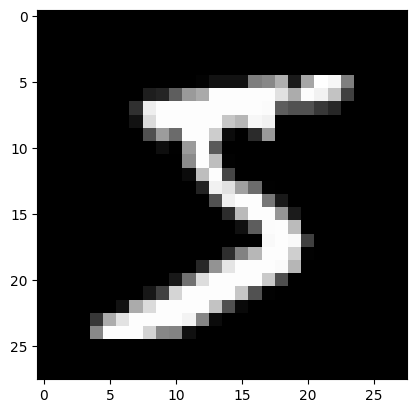

In [100]:
plt.imshow(x_train[0],cmap='gray') # Display the first image of the training set i.e '2'

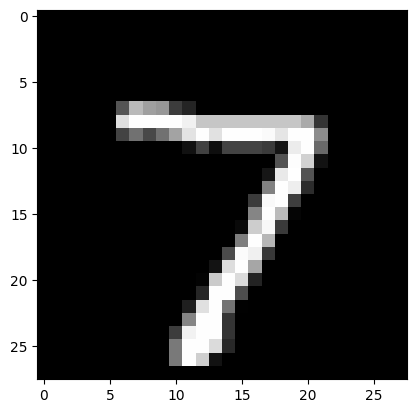

In [99]:
plt.imshow(x_test[0],cmap='gray') # Display the first image of the testing data i.e '7'

In [23]:
x_test[0].shape # Each image is 28*28 pixels

(28, 28)

#### Normalizing data

In [39]:
x_train=x_train/255.0
x_test=x_test/255.0

#### Flatten 2d data into 1d data

In [40]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [41]:
x_train_flatten.shape,x_test_flatten.shape

((60000, 784), (10000, 784))

#### Importing dense layer and sequential model

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [43]:
model=Sequential()

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), # first layer with 128 neurons and ReLu as activation function
    Dense(64, activation='relu'), # second layer with 64 neurons and ReLu as activation function
    Dense(10, activation='softmax')  # 10  output layer for digits 0-9 we use sigmoid activation function for binary classification
])


In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

#### Fitting our model

In [70]:
model.fit(x_train_flatten,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9575 - loss: 0.1496
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9580 - loss: 0.1447
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9587 - loss: 0.1443
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9597 - loss: 0.1363
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9608 - loss: 0.1341
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9634 - loss: 0.1280
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9631 - loss: 0.1235
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9666 - loss: 0.1147
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9661 - loss: 0.1180
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9693 - loss: 0.1072


#### Evaluating accuracy

In [73]:
accuracy=model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9545 - loss: 0.1477


#### Checking model's accuracy with some images

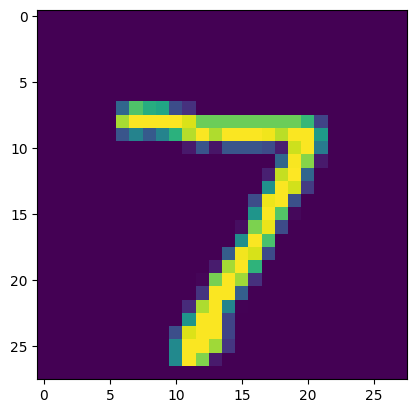

In [58]:
plt.imshow(x_test[0]) # First image is seven

In [76]:
first_img_prediction=model.predict(x_test_flatten[0].reshape(1,784))
first_img_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[2.3922761e-05, 1.9473825e-09, 1.5441816e-04, 5.9570419e-03,
        1.1323202e-09, 3.5304871e-05, 4.2397428e-14, 9.9368203e-01,
        7.7974491e-06, 1.3952899e-04]], dtype=float32)

In [77]:
first_img_idx=np.argmax(first_img_prediction) # it predict index of maximum value in numpy array
first_img_idx

np.int64(7)

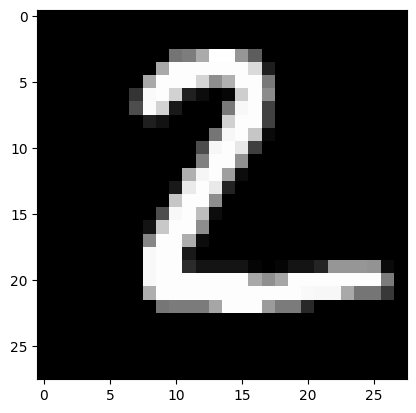

In [80]:
plt.imshow(x_test[1],cmap='gray') # Second image is two

In [82]:
second_img_prediction=model.predict(x_test_flatten[1].reshape(1,784))
second_img_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[1.9637751e-05, 1.9201392e-04, 9.8816842e-01, 1.1502805e-02,
        4.0653682e-14, 5.6347482e-05, 4.8816233e-05, 4.6367962e-10,
        1.2051023e-05, 1.3046543e-14]], dtype=float32)

In [83]:
second_img_idx=np.argmax(second_img_prediction)
second_img_idx


np.int64(2)

In [87]:
y_predicted=model.predict(x_test_flatten)
y_predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.3922785e-05, 1.9473863e-09, 1.5441830e-04, ..., 9.9368203e-01,
        7.7974564e-06, 1.3952912e-04],
       [1.9637731e-05, 1.9201355e-04, 9.8816842e-01, ..., 4.6368051e-10,
        1.2051023e-05, 1.3046543e-14],
       [2.2799121e-07, 9.9284065e-01, 1.3480244e-03, ..., 1.6101374e-03,
        2.0292487e-03, 6.6259156e-05],
       ...,
       [8.6842747e-12, 4.3320693e-08, 1.3433050e-09, ..., 1.4873372e-05,
        3.8709608e-04, 2.7208922e-03],
       [3.0209953e-06, 4.7548303e-07, 2.2313660e-09, ..., 7.4617947e-09,
        1.1037372e-03, 1.2142272e-07],
       [4.6285004e-05, 2.4891957e-12, 2.7822094e-05, ..., 5.2793451e-12,
        3.0689066e-07, 8.7436464e-10]], dtype=float32)

In [88]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

#### Condfusion matrix

In [89]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    3,    0,    6,    3,    2,    0,    1],
       [   0, 1120,    1,    3,    0,    1,    3,    2,    5,    0],
       [   7,    1,  977,   21,    1,    0,    3,   13,    8,    1],
       [   1,    1,    3,  984,    2,    3,    0,    9,    5,    2],
       [   2,    0,    1,    1,  940,    1,    9,    2,    3,   23],
       [   5,    2,    0,   12,    3,  848,    6,    2,    7,    7],
       [   7,    3,    0,    0,    5,    9,  930,    0,    4,    0],
       [   0,    8,   12,   10,    1,    1,    0,  985,    1,   10],
       [   5,    1,    1,   24,    7,    9,    7,    5,  910,    5],
       [   6,    4,    1,   12,   13,    4,    0,    6,    4,  959]],
      dtype=int32)>

#### Visualization

###### This creates a heatmap — a color-coded matrix where the color intensity represents the magnitude of the values.
###### annot=True:
###### This adds numerical annotations (i.e., the numbers) to each cell of the heatmap, so you can see exact counts.
###### fmt='d':
###### This formats the annotations as decimal integers (d = decimal).

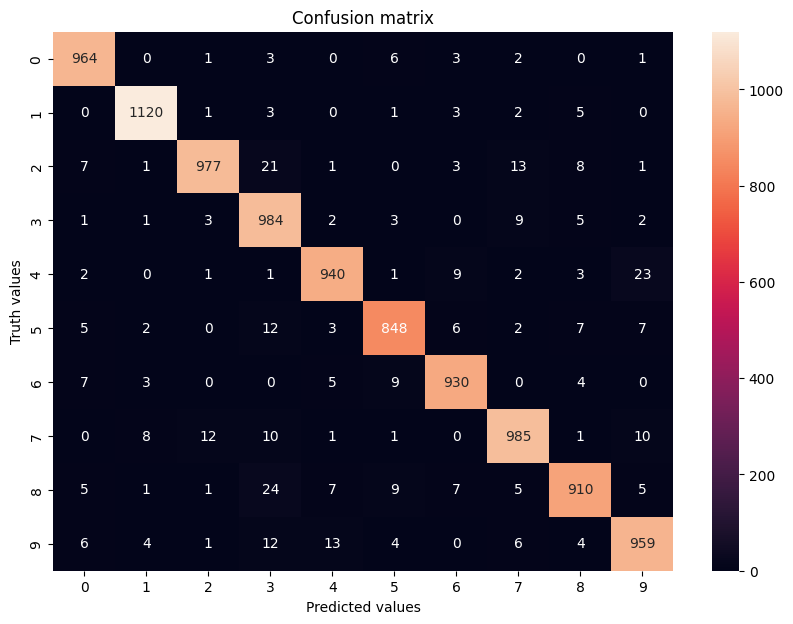

In [98]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Truth values')
plt.title('Confusion matrix')
plt.show()

In [96]:
# Any thing that is not in daigonal is error 